# Linear Regression

### apply simple linear regression to web traffic data and also trying to OVERFIT it by increasing the DEGREE

#### Reading lib

In [36]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Reading .tsv data

In [4]:
data = sp.genfromtxt('./web traffic/web_traffic.tsv', delimiter="\t")
data[:10]  # web traffic data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       [  4.00000000e+00,   1.36500000e+03],
       [  5.00000000e+00,   1.48800000e+03],
       [  6.00000000e+00,   1.33700000e+03],
       [  7.00000000e+00,   1.88300000e+03],
       [  8.00000000e+00,   2.28300000e+03],
       [  9.00000000e+00,   1.33500000e+03],
       [  1.00000000e+01,   1.02500000e+03]])

In [5]:
print data.shape # shape of data

(743, 2)


### 743 observation and 2 variables

In [11]:
x = data[:,0]  # 1st col
y = data[:,1]  # 2nd col

### Removing missing values

In [34]:
sp.sum(sp.isnan(x)) # missing value 

0

In [37]:
idx = np.isfinite(x) & np.isfinite(y)

In [38]:
y = y[idx]# excluding missing value
x = x[idx]

### Plot for web Traffic Data

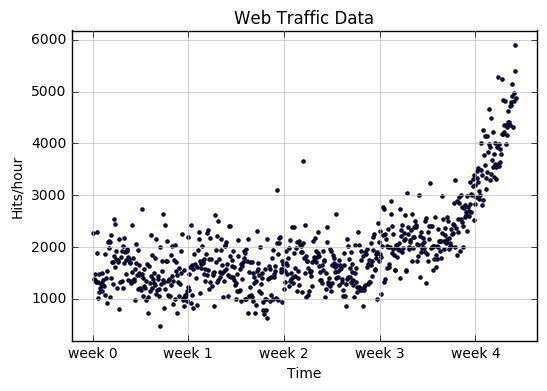

In [39]:
plt.scatter(x, y, s=5)
plt.title('Web Traffic Data')
plt.xlabel('Time')
plt.ylabel('Hits/hour')
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' %w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color= '0.75')
plt.show()

### Fitting a simple straight line
##### Equation of straight line is -
#### f(x) =  2.59619213*x + 989.02487106

In [50]:
fp1, residual, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print 'Models Parameters :',fp1 # parameters
print 'Residuals :', residual # residuals


Models Parameters : [   2.59619213  989.02487106]
Residuals : [  3.17389767e+08]


## Function to find residuals(SSE)

In [42]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2) # function for finding error

In [43]:
f1 = sp.poly1d(fp1) # create a model function from the model parameters
print 'Residual :', (error(f1, x, y))

Residual : 317389767.34


In [53]:
fx = sp.linspace(0, x[-1], 1000) # x value for plotting

## Ploting Line 

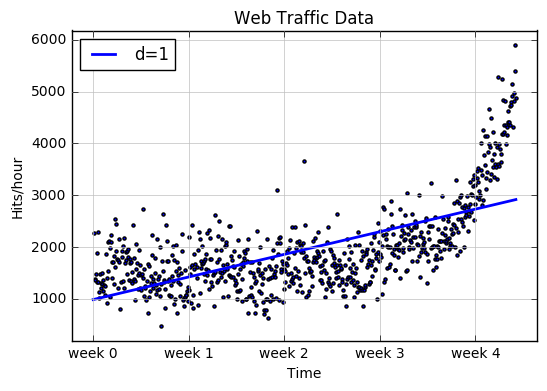

In [52]:
plt.scatter(x, y, s=5)
plt.plot(fx, f1(fx), linewidth=2)
plt.legend(['d=%i' %f1.order], loc='upper left')
plt.title('Web Traffic Data')
plt.xlabel('Time')
plt.ylabel('Hits/hour')
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' %w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color= '0.75')
plt.show()

### Similarily we check regression using DEGREE 2

# Degree 2
#### Model equation for Degree 2 is:
#### f(x) = 0.0105322 * x^2 - 5.26545 * x - 1974.76082

In [54]:
fp2 = sp.polyfit(x, y, 2) # degree 2 fitting of line
f2 = sp.poly1d(fp2) # Model function
print 'Model Parameters :', fp2
print 'Residuals :', error(f2, x, y)

Model Parameters : [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
Residuals : 179983507.878


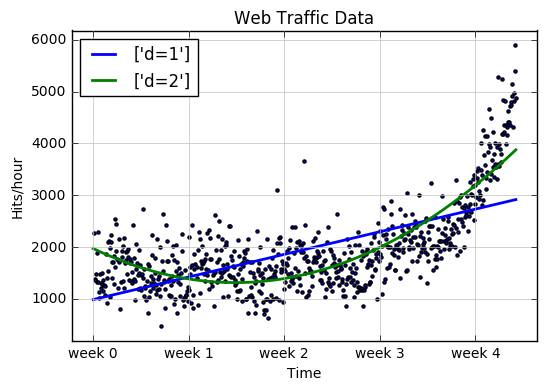

In [55]:
plt.scatter(x, y, s=5)
plt.plot(fx, f1(fx), linewidth=2)
plt.plot(fx, f2(fx), linewidth=2)
plt.legend((['d=%i' %f1.order],['d=%i' %f2.order]), loc='upper left')
plt.title('Web Traffic Data')
plt.xlabel('Time')
plt.ylabel('Hits/hour')
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' %w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color= '0.75')
plt.show()

# Degree 3, 10, 53

In [58]:
fp3 = sp.polyfit(x, y, 3) # degree 3
fp10 = sp.polyfit(x, y, 10) # degree 10
fp53 = sp.polyfit(x, y, 53) # degree 53
# MODEL FUNCTION
f3 = sp.poly1d(fp3)
f10 = sp.poly1d(fp10)
f53 = sp.poly1d(fp53)
# RESIDUALS
print 'Residuals D1:', (error(f1, x, y))
print 'Residuals D2:', error(f2, x, y)
print 'Residuals D3:', error(f3, x, y)
print 'Residuals D10:', error(f10, x, y)
print 'Residuals D53:', error(f53, x, y)

Residuals D1: 317389767.34
Residuals D2: 179983507.878
Residuals D3: 139350144.032
Residuals D10: 121942326.364
Residuals D53: 109452405.028


/home/sekhar/miniconda2/envs/ipy_env/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


### As DEGREE increases residuals(SSE) of model decreases(overfitting)

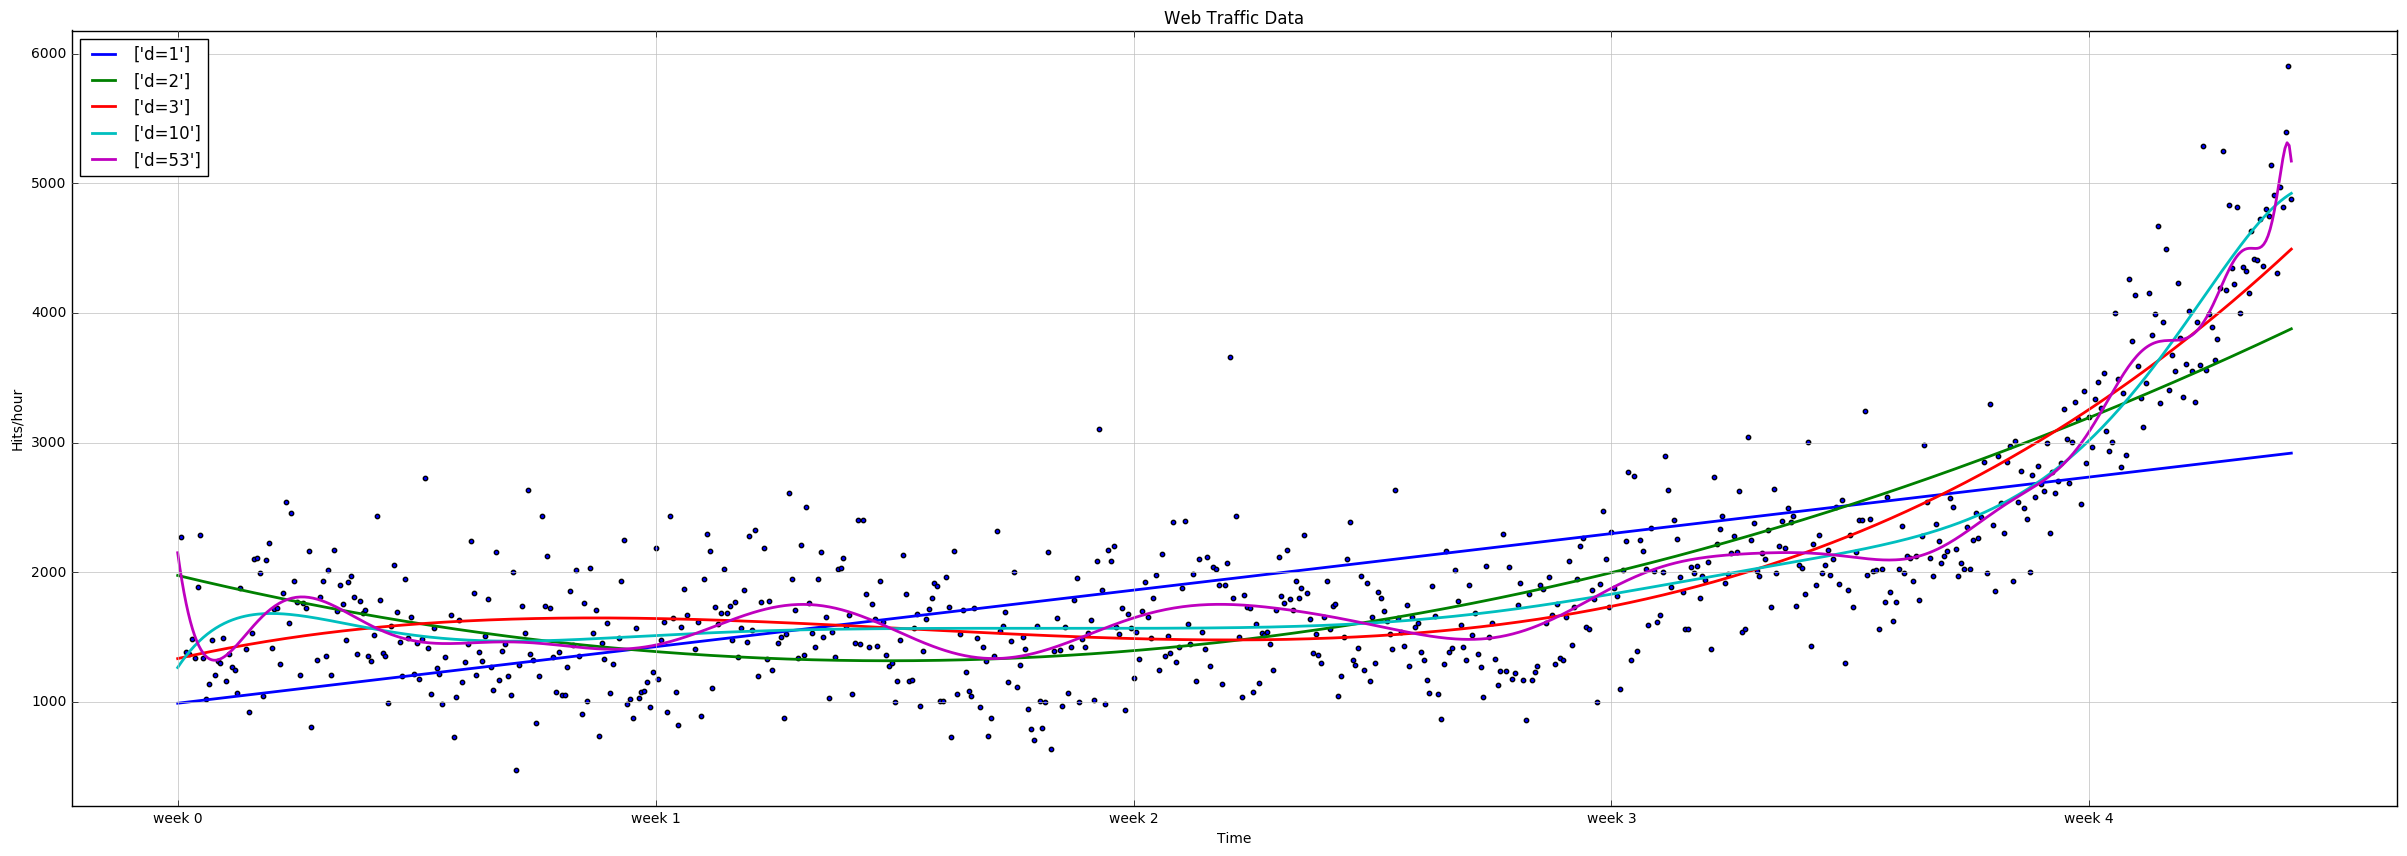

In [59]:
plt.figure(figsize=(30, 10))
plt.scatter(x, y, s=10)
plt.plot(fx, f1(fx), linewidth=2)
plt.plot(fx, f2(fx), linewidth=2)
plt.plot(fx, f3(fx), linewidth=2)
plt.plot(fx, f10(fx), linewidth=2)
plt.plot(fx, f53(fx), linewidth=2)
plt.legend((['d=%i' %f1.order],['d=%i' %f2.order],['d=%i' %f3.order],['d=%i' %f10.order],['d=%i' %f53.order]), loc='upper left')
plt.title('Web Traffic Data')
plt.xlabel('Time')
plt.ylabel('Hits/hour')
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' %w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color= '0.75')
plt.show()